In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use("fivethirtyeight")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [3]:
# pip install fredapi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from fredapi import Fred

In [7]:
fred_key = '455e4afef378b949a7e07d1196c0d232'

# Fred object

In [13]:
fred = Fred(api_key = fred_key)

## Economic Data

In [14]:
sp_search = fred.search("S&P", order_by = 'popularity')

In [16]:
sp_search

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2024-03-06   2024-03-06   
CSUSHPINSA              CSUSHPINSA     2024-03-06   2024-03-06   
SP500                        SP500     2024-03-06   2024-03-06   
MEHOINUSA672N        MEHOINUSA672N     2024-03-06   2024-03-06   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2024-03-06   2024-03-06   
...                            ...            ...          ...   
DDDI12SMA156NWDB  DDDI12SMA156NWDB     2024-03-06   2024-03-06   
DDDI01GTA156NWDB  DDDI01GTA156NWDB     2024-03-06   2024-03-06   
Q03069USQ605NNBR  Q03069USQ605NNBR     2024-03-06   2024-03-06   
CSHXCPVEA156NRUG  CSHXCPVEA156NRUG     2024-03-06   2024-03-06   
CSHMCPNPA156NRUG  CSHMCPNPA156NRUG     2024-03-06   2024-03-06   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                       S&P 500   
MEHOINUSA672N     Real Median Household Income in the United States   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
...                                                             ...   
DDDI12SMA156NWDB  Private Credit by Deposit Money Banks and Othe...   
DDDI01GTA156NWDB  Private Credit by Deposit Money Banks to GDP f...   
Q03069USQ605NNBR  Revenue Freight Tons Originated, Less Than Car...   
CSHXCPVEA156NRUG  Share of Merchandise Exports at Current Purcha...   
CSHMCPNPA156NRUG  Share of Merchandise Imports at Current Purcha...   

                 observation_start observation_end     frequency  \
series id                                                          
BAMLH0A0HYM2            1996-12-31      2024-03-05  Daily, Close   
CSUSHPINSA              1987-01-01      2023-12-01       Monthly   
SP500                   2014-03-06      2024-03-05  Daily, Close   
MEHOINUSA672N           1984-01-01      2022-01-01        Annual   
BAMLH0A0HYM2EY          1996-12-31      2024-03-05  Daily, Close   
...                            ...             ...           ...   
DDDI12SMA156NWDB        2001-01-01      2018-01-01        Annual   
DDDI01GTA156NWDB        1960-01-01      2020-01-01        Annual   
Q03069USQ605NNBR        1920-01-01      1943-07-01     Quarterly   
CSHXCPVEA156NRUG        1950-01-01      2019-01-01        Annual   
CSHMCPNPA156NRUG        1960-01-01      2019-01-01        Annual   

                 frequency_short                           units  \
series id                                                          
BAMLH0A0HYM2                   D                         Percent   
CSUSHPINSA                     M              Index Jan 2000=100   
SP500                          D                           Index   
MEHOINUSA672N                  A  2022 CPI-U-RS Adjusted Dollars   
BAMLH0A0HYM2EY                 D                         Percent   
...                          ...                             ...   
DDDI12SMA156NWDB               A                         Percent   
DDDI01GTA156NWDB               A                         Percent   
Q03069USQ605NNBR               Q               Thousands of Tons   
CSHXCPVEA156NRUG               A                         Percent   
CSHMCPNPA156NRUG               A                         Percent   

                               units_short      seasonal_adjustment  \
series id                                                             
BAMLH0A0HYM2                             %  Not Seasonally Adjusted   
CSUSHPINSA              Index Jan 2000=100  Not Seasonally Adjusted   
SP500                                Index  Not Seasonally Adjusted   
MEHOINUSA672N     2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                           %  Not Seaso

In [15]:
sp_search.shape

(1000, 15)

## Pull Raw Data

In [18]:
sp500 = fred.get_series(series_id = 'SP500')

<AxesSubplot:title={'center':'S&P 500'}>

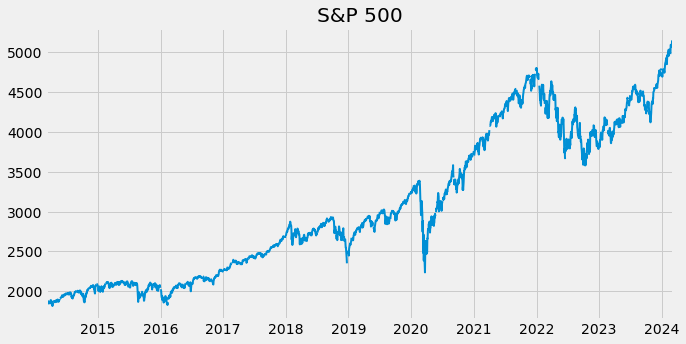

In [21]:
sp500.plot(figsize = (10,5),title = 'S&P 500', lw = 2)

## Join Mutiple Data Series

In [22]:
unemp_results = fred.search("unemployment")

In [26]:
unrate = fred.get_series('UNRATE')

<AxesSubplot:>

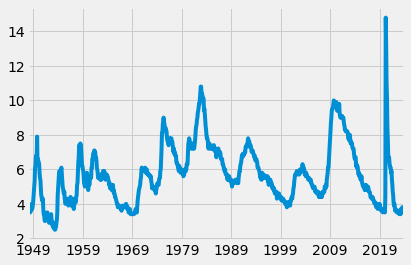

In [27]:
unrate.plot()

In [28]:
unemp_results

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2024-03-06   2024-03-06   
UNRATENSA                          UNRATENSA     2024-03-06   2024-03-06   
UNEMPLOY                            UNEMPLOY     2024-03-06   2024-03-06   
NROU                                    NROU     2024-03-06   2024-03-06   
CCSA                                    CCSA     2024-03-06   2024-03-06   
...                                      ...            ...          ...   
LAUMT134234000000003A  LAUMT134234000000003A     2024-03-06   2024-03-06   
LRHUTTTTUSQ156S              LRHUTTTTUSQ156S     2024-03-06   2024-03-06   
SAND706UR                          SAND706UR     2024-03-06   2024-03-06   
LNU04000029                      LNU04000029     2024-03-06   2024-03-06   
BUFF336UR                          BUFF336UR     2024-03-06   2024-03-06   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
UNEMPLOY                                              Unemployment Level   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
...                                                                  ...   
LAUMT134234000000003A            Unemployment Rate in Savannah, GA (MSA)   
LRHUTTTTUSQ156S        Harmonized Unemployment: Monthly Rates: Total:...   
SAND706UR              Unemployment Rate in San Diego-Carlsbad, CA (MSA)   
LNU04000029              Unemployment Rate - 20 Yrs. & over, White Women   
BUFF336UR              Unemployment Rate in Buffalo-Cheektowaga-Niaga...   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2024-01-01   
UNRATENSA                    1948-01-01      2024-01-01   
UNEMPLOY                     1948-01-01      2024-01-01   
NROU                         1949-01-01      2034-10-01   
CCSA                         1967-01-07      2024-02-17   
...                                 ...             ...   
LAUMT134234000000003A        1990-01-01      2022-01-01   
LRHUTTTTUSQ156S              1960-01-01      2023-10-01   
SAND706UR                    1990-01-01      2023-12-01   
LNU04000029                  1954-01-01      2024-01-01   
BUFF336UR                    1990-01-01      2023-12-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
UNEMPLOY                               Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
...                                        ...             ...   
LAUMT134234000000003A                   Annual               A   
LRHUTTTTUSQ156S                      Quarterly               Q   
SAND706UR                              Monthly               M   
LNU04000029                            Monthly               M   
BUFF336UR                              Monthly               M   

                                      units        units_short  \
series id                                                        
UNRATE                              Percent                  %   
UNRATENSA                           Percent                  %   
UNEMPLOY               Thousands of Persons  Thous. of Persons   
NROU                                Percent                  %   
CCSA                                 Numb

In [97]:
unemp_df = fred.search("unemployment rate state",filter = ('frequency', 'Monthly'))

In [98]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [99]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]

In [100]:
all_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [102]:
pd.concat(all_results, axis = 1)

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ...  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4  ...   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4  ...   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4  ...   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3  ...   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2023-08-01   4.6   4.1   3.9   2.7   3.5   3.4   3.7   2.1   2.6   3.3  ...   
2023-09-01   4.7   4.1   4.0   2.8   3.4   3.4   3.9   2.2   2.6   3.4  ...   
2023-10-01   4.8   4.1   4.2   2.8   3.4   3.6   4.1   2.3   2.8   3.4  ...   
2023-11-01   4.9   4.1   4.3   2.9   3.4   3.6   4.3   2.4   2.9   3.5  ...   
2023-12-01   5.1   4.0   4.5   3.0   3.5   3.7   4.3   2.6   3.2   3.5  ...   

            KSUR  WYUR  DEUR  VTUR  SDUR  CMWRUR  CSOUUR  CNERUR  CWSTUR  \
1976-01-01   4.2   4.1   8.0   8.6   3.3     6.8     6.9     9.6     8.6   
1976-02-01   4.2   4.1   8.0   8.6   3.3     6.8     6.9     9.6     8.6   
1976-03-01   4.2   4.1   8.0   8.6   3.2     6.8     6.9     9.6     8.6   
1976-04-01   4.2   4.0   8.1   8.6   3.1     6.7     6.8     9.5     8.5   
1976-05-01   4.2   3.9   8.3   8.5   3.1     6.6     6.7     9.5     8.5   
...          ...   ...   ...   ...   ...     ...     ...     ...     ...   
2023-08-01   2.7   2.9   4.1   1.8   1.9     3.3     3.2     3.5     4.0   
2023-09-01   2.8   2.9   4.1   1.9   1.9     3.4     3.2     3.6     4.1   
2023-10-01   2.9   2.9   4.2   2.0   2.0     3.6     3.3     3.7     4.2   
2023-11-01   2.9   3.0   4.2   2.1   2.0     3.7     3.4     3.8     4.3   
2023-12-01   2.8   3.0   4.2   2.2   2.0     3.7     3.4     3.9     4.5   

            CNEWUR  
1976-01-01     9.6  
1976-02-01     9.6  
1976-03-01     9.6  
1976-04-01     9.4  
1976-05-01     9.3  
...            ...  
2023-08-01     2.7  
2023-09-01     2.7  
2023-10-01     2.8  
2023-11-01     2.9  
2023-12-01     3.1  

[576 rows x 59 columns]

In [103]:
unemp_results = pd.concat(all_results, axis = 1)

In [107]:
unemp_states = unemp_results.dropna()

In [108]:
px.line(unemp_states)

## Pull May 2020 Unemployment Rate per State

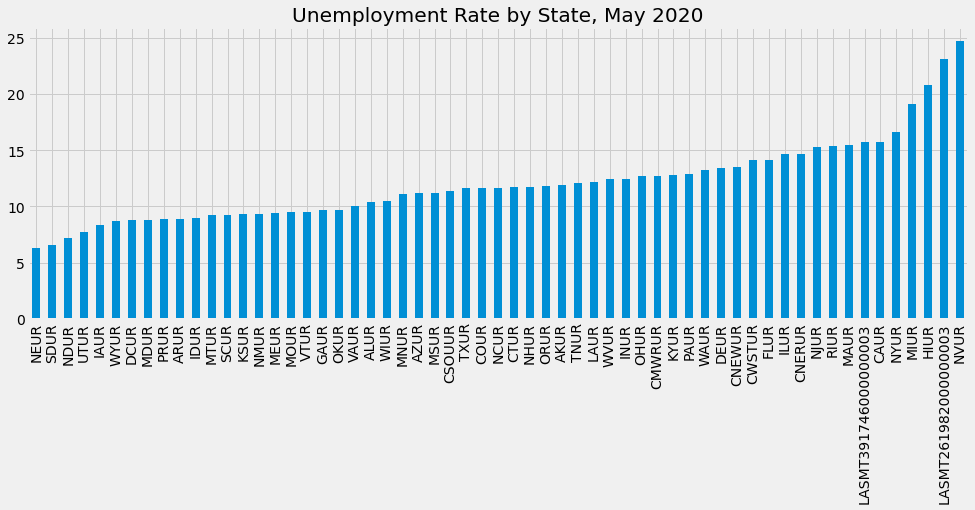

In [109]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T.sort_values('2020-05-01') \
    .plot(kind = 'bar', figsize = (15,5), title = 'Unemployment Rate by State, May 2020')
ax.legend().remove()
plt.show()

In [113]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()

In [115]:
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [116]:
unemp_states

California   Texas   New York   Florida   Pennsylvania   Ohio  \
1990-01-01          5.2     6.3        5.2       5.8            5.2    6.0   
1990-02-01          5.2     6.3        5.1       5.8            5.2    5.9   
1990-03-01          5.2     6.3        5.1       5.9            5.2    5.7   
1990-04-01          5.3     6.2        5.0       5.9            5.2    5.6   
1990-05-01          5.4     6.3        5.0       6.0            5.2    5.6   
...                 ...     ...        ...       ...            ...    ...   
2023-08-01          4.6     4.1        3.9       2.7            3.5    3.4   
2023-09-01          4.7     4.1        4.0       2.8            3.4    3.4   
2023-10-01          4.8     4.1        4.2       2.8            3.4    3.6   
2023-11-01          4.9     4.1        4.3       2.9            3.4    3.6   
2023-12-01          5.1     4.0        4.5       3.0            3.5    3.7   

             Michigan   Alabama   Massachusetts   North Carolina  ...  \
1990-01-01        7.7       6.7             5.3              3.5  ...   
1990-02-01        7.6       6.7             5.4              3.5  ...   
1990-03-01        7.5       6.7             5.6              3.5  ...   
1990-04-01        7.4       6.7             5.8              3.6  ...   
1990-05-01        7.4       6.7             6.0              3.7  ...   
...               ...       ...             ...              ...  ...   
2023-08-01        3.7       2.1             2.6              3.3  ...   
2023-09-01        3.9       2.2             2.6              3.4  ...   
2023-10-01        4.1       2.3             2.8              3.4  ...   
2023-11-01        4.3       2.4             2.9              3.5  ...   
2023-12-01        4.3       2.6             3.2              3.5  ...   

             Kansas   Wyoming   Delaware   Vermont   South Dakota  \
1990-01-01      4.1       5.5        3.5       4.0            3.7   
1990-02-01      4.0       5.3        3.5       4.1            3.7   
1990-03-01      4.0       5.2        3.5       4.2            3.7   
1990-04-01      4.0       5.1        3.5       4.3            3.6   
1990-05-01      4.1       5.0        3.5       4.5            3.6   
...             ...       ...        ...       ...            ...   
2023-08-01      2.7       2.9        4.1       1.8            1.9   
2023-09-01      2.8       2.9        4.1       1.9            1.9   
2023-10-01      2.9       2.9        4.2       2.0            2.0   
2023-11-01      2.9       3.0        4.2       2.1            2.0   
2023-12-01      2.8       3.0        4.2       2.2            2.0   

             Midwest Census Region   South Census Region  \
1990-01-01                     5.6                   5.4   
1990-02-01                     5.6                   5.4   
1990-03-01                     5.5                   5.4   
1990-04-01                     5.4                   5.4   
1990-05-01                     5.4                   5.5   
...                            ...                   ...   
2023-08-01                     3.3                   3.2   
2023-09-01                     3.4                   3.2   
2023-10-01                     3.6                   3.3   
2023-11-01                     3.7                   3.4   
2023-12-01                     3.7                   3.4   

             Northeast Census Region   West Census Region  \
1990-01-01                       5.0                  5.2   
1990-02-01                       5.0                  5.2   
1990-03-01                       5.0                  5.2   
1990-04-01                       5.1                  5.2   
1990-05-01                       5.1                  5.3   
...                              ...                  ...   
2023-08-01                       3.5                  4.0   
2023-09-01                       3.6                  4.1   
2023-10-01                       3.7                  4.2   
2023-11-01                       3.8   

In [117]:
px.line(unemp_states)

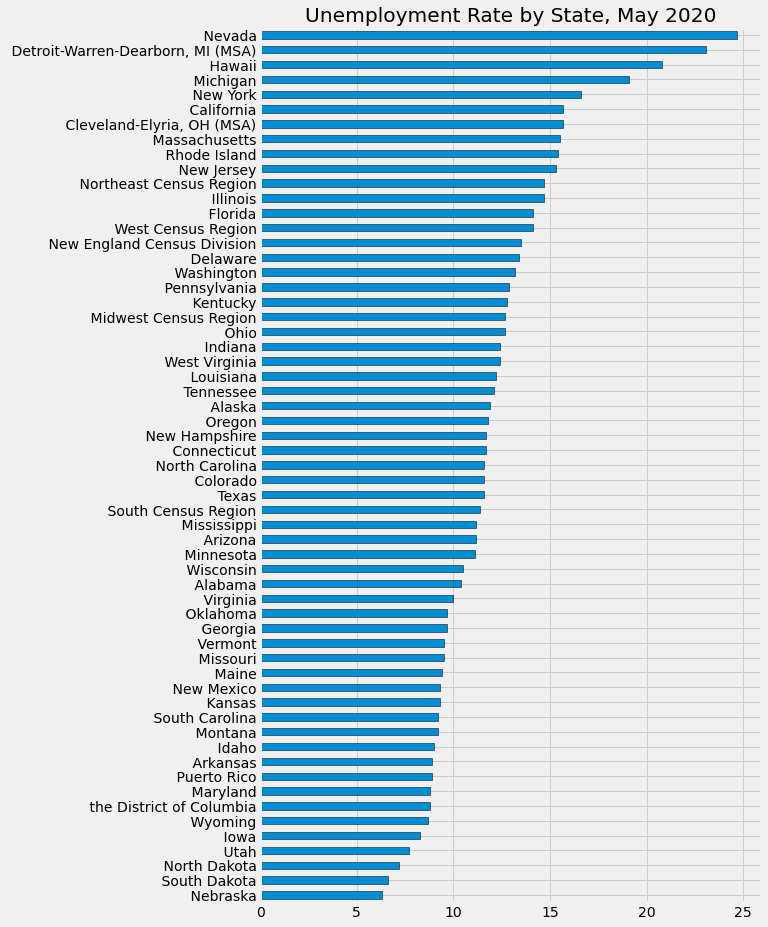

In [121]:
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T.sort_values('2020-05-01') \
    .plot(kind = 'barh', figsize = (8,15), edgecolor = 'black',
          title = 'Unemployment Rate by State, May 2020')
ax.legend().remove()
plt.show()

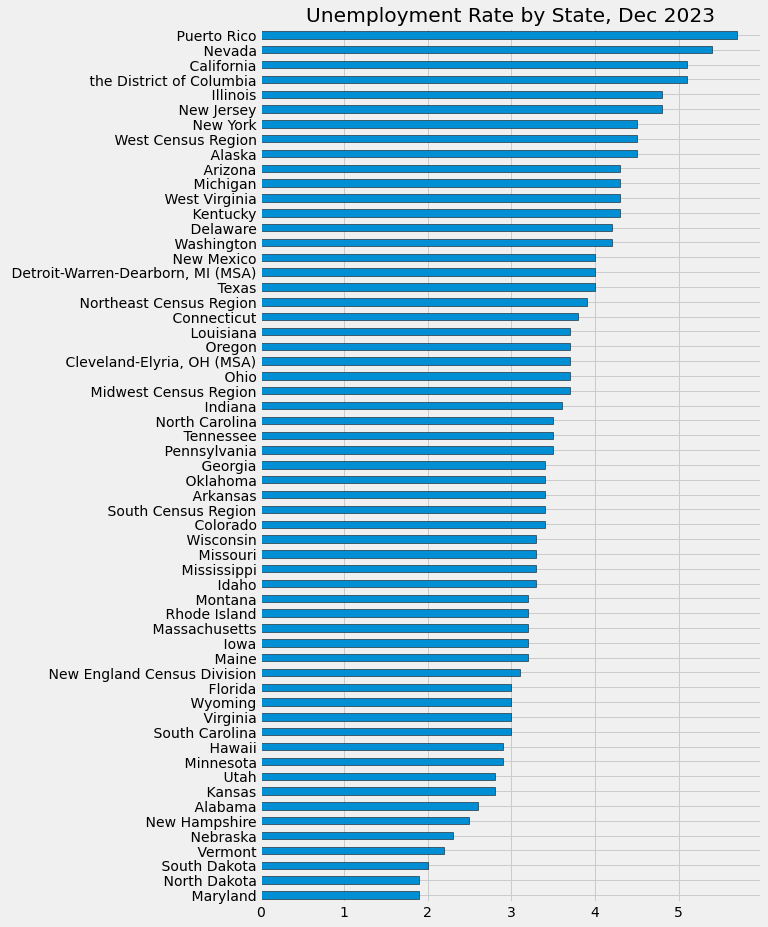

In [123]:
ax = unemp_states.loc[unemp_states.index == '2023-12-01'].T.sort_values('2023-12-01') \
    .plot(kind = 'barh', figsize = (8,15), edgecolor = 'black',
          title = 'Unemployment Rate by State, Dec 2023')
ax.legend().remove()
plt.show()